# Loan Data Exploration

What factors affect a loan’s outcome status?


What affects the borrower’s APR or interest rate?


Are there differences between loans depending on how large the original loan amount was?

- ListingKey 	 **category**         D             
- CreditGrade  	**category**                D
- Term         	 int64  - **category**     D
- BorrowerRate   	 float64 **Quantitative**
- ProsperRating (Alpha)  	**category**            D
- ProsperScore   		 **category**          D
- ListingCategory (numeric) 	 **category**
- Occupation	  		object   - **category**
- EmploymentStatus    		 object   - **category**                   
- EmploymentStatusDuration     float64 **Quantitative**        
- IsBorrowerHomeowner         bool     **category**                           
- IncomeRange               **category**               D                                   
- IncomeVerifiable          bool  **category**                                                  
- StatedMonthlyIncome       float64   **Quantitative**
- MonthlyLoanPayment        float64   **Quantitative**
- LoanOriginalAmount        int64     **Quantitative**
- DebtToIncomeRatio           int64     **Quantitative** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv('prosperLoanData.csv')

## Data Assessing

### Visual Assessment

In [4]:
df.head(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.0,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,0.0796,0.0249,0.0547,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.0,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


In [5]:
df.tail(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,3.0,D,3.0,1,TX,Other,Employed,84.0,True,False,NaN,2013-12-13 05:49:15,700.0,719.0,2002-02-25 00:00:00,12.0,12.0,25.0,9,521.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,22147.0,0.73,7853.0,25.0,1.00,0.0,0.51,"$25,000-49,999",True,2875.000000,DD1A370200396006300ACA0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,123122,10000,2013-12-23 00:00:00,Q4 2013,0FE0370029359765342FDB5,273.35,546.7000,183.15,363.5500,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,4.0,C,5.0,2,GA,Food Service,Full-time,94.0,True,False,NaN,2011-11-14 13:18:24,680.0,699.0,1993-12-01 00:00:00,11.0,11.0,22.0,7,488.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,11956.0,0.69,4137.0,19.0,0.80,1.0,0.48,"$25,000-49,999",True,3875.000000,589536350469116027ED11B,1.0,16.0,16.0,0.0,0.0,5000.0,3264.37,-4.0,0,NaN,28,56401,15000,2011-11-21 00:00:00,Q4 2011,A33834861822272782621C8,449.55,21122.5600,15000.00,6122.5600,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,0.09071,0.0299,0.06081,6.0,A,7.0,1,NY,Professor,Employed,244.0,False,False,NaN,2014-01-15 09:27:40,680.0,699.0,1995-01-01 00:00:00,10.0,9.0,44.0,8,289.0,0.0,1.0,1.0,257.0,3.0,1.0,0.0,6166.0,0.80,675.0,36.0,0.75,0.0,0.23,"$50,000-74,999",True,4583.333333,00AF3704550953269A64E40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,127508,2000,2014-01-21 00:00:00,Q1 2014,CE1E3704648000761C9F724,64.90,64.3307,47.25,17.0807,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


### Programmatic Assessment

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [7]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [8]:
# Check columns that can be turned into categorical variables
for i in list(df):
    print(i, df[i].nunique())    

ListingKey 113066
ListingNumber 113066
ListingCreationDate 113064
CreditGrade 8
Term 3
LoanStatus 12
ClosedDate 2802
BorrowerAPR 6677
BorrowerRate 2294
LenderYield 2283
EstimatedEffectiveYield 1582
EstimatedLoss 120
EstimatedReturn 1476
ProsperRating (numeric) 7
ProsperRating (Alpha) 7
ProsperScore 11
ListingCategory (numeric) 21
BorrowerState 51
Occupation 67
EmploymentStatus 8
EmploymentStatusDuration 605
IsBorrowerHomeowner 2
CurrentlyInGroup 2
GroupKey 706
DateCreditPulled 112992
CreditScoreRangeLower 26
CreditScoreRangeUpper 26
FirstRecordedCreditLine 11585
CurrentCreditLines 54
OpenCreditLines 52
TotalCreditLinespast7years 118
OpenRevolvingAccounts 48
OpenRevolvingMonthlyPayment 2834
InquiriesLast6Months 50
TotalInquiries 102
CurrentDelinquencies 47
AmountDelinquent 7059
DelinquenciesLast7Years 100
PublicRecordsLast10Years 25
PublicRecordsLast12Months 7
RevolvingCreditBalance 38555
BankcardUtilization 201
AvailableBankcardCredit 31829
TotalTrades 108
TradesNeverDelinquent (percen

In [9]:
df['IncomeRange'].unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

In [10]:
df['CreditGrade'].unique()

array(['C', nan, 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

In [11]:
df['Term'].unique()

array([36, 60, 12], dtype=int64)

In [12]:
df['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [13]:
df['ProsperRating (Alpha)'].unique()

array([nan, 'A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

In [14]:
df['ListingCategory (numeric)'].unique()

array([ 0,  2, 16,  1,  7, 13,  6, 15, 20, 19,  3, 18,  8,  4, 11, 14,  5,
        9, 17, 10, 12], dtype=int64)

In [15]:
df['ProsperScore'].value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

## Data Cleaning

In [16]:
# change numeric of ListingCategory to text data 
for i in range(len(df)):
    if df['ListingCategory (numeric)'].iloc[i] == 0:
        df['ListingCategory (numeric)'].iloc[i] = 'Not Available'
    elif df['ListingCategory (numeric)'].iloc[i] == 1:
        df['ListingCategory (numeric)'].iloc[i] = 'Debt Consolidation'
    elif df['ListingCategory (numeric)'].iloc[i] == 2:
        df['ListingCategory (numeric)'].iloc[i] = 'Home Improvement'
    elif df['ListingCategory (numeric)'].iloc[i] == 3:
        df['ListingCategory (numeric)'].iloc[i] = 'Business'
    elif df['ListingCategory (numeric)'].iloc[i] == 4:
        df['ListingCategory (numeric)'].iloc[i] = 'Personal Loan'
    elif df['ListingCategory (numeric)'].iloc[i] == 5:
        df['ListingCategory (numeric)'].iloc[i] = 'Student Use'
    elif df['ListingCategory (numeric)'].iloc[i] == 6:
        df['ListingCategory (numeric)'].iloc[i] = 'Auto'
    elif df['ListingCategory (numeric)'].iloc[i] == 7:
        df['ListingCategory (numeric)'].iloc[i] = 'Other'
    elif df['ListingCategory (numeric)'].iloc[i] == 8:
        df['ListingCategory (numeric)'].iloc[i] = 'Baby&Adoption'
    elif df['ListingCategory (numeric)'].iloc[i] == 9:
        df['ListingCategory (numeric)'].iloc[i] = 'Boat'
    elif df['ListingCategory (numeric)'].iloc[i] == 10:
        df['ListingCategory (numeric)'].iloc[i] = 'Cosmetic Procedure'
    elif df['ListingCategory (numeric)'].iloc[i] == 11:
        df['ListingCategory (numeric)'].iloc[i] = 'Engagement Ring'
    elif df['ListingCategory (numeric)'].iloc[i] == 12:
        df['ListingCategory (numeric)'].iloc[i] = 'Green Loans'
    elif df['ListingCategory (numeric)'].iloc[i] == 13:
        df['ListingCategory (numeric)'].iloc[i] = 'Household Expenses'
    elif df['ListingCategory (numeric)'].iloc[i] == 14:
        df['ListingCategory (numeric)'].iloc[i] = 'Large Purchases'
    elif df['ListingCategory (numeric)'].iloc[i] == 15:
        df['ListingCategory (numeric)'].iloc[i] = 'Medical/Dental'
    elif df['ListingCategory (numeric)'].iloc[i] == 16:
        df['ListingCategory (numeric)'].iloc[i] = 'Motorcycle'
    elif df['ListingCategory (numeric)'].iloc[i] == 17:
        df['ListingCategory (numeric)'].iloc[i] = 'RV'
    elif df['ListingCategory (numeric)'].iloc[i] == 18:
        df['ListingCategory (numeric)'].iloc[i] = 'Taxes'
    elif df['ListingCategory (numeric)'].iloc[i] == 19:
        df['ListingCategory (numeric)'].iloc[i] = 'Vacation'
    elif df['ListingCategory (numeric)'].iloc[i] == 20:
        df['ListingCategory (numeric)'].iloc[i] = 'Wedding Loans'
        

C:\Users\minsung_kim\AppData\Local\Continuum\anaconda3\envs\py38\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
# convert ListingKey, ListingCategory (numeric) into categorical types
df['ListingKey'] = df['ListingKey'].astype('category')
df['ListingCategory (numeric)'] = df['ListingCategory (numeric)'].astype('category')
# change column name - > ListingCategory (numeric) to ListingCategory
df = df.rename({'ListingCategory (numeric)': 'ListingCategory'}, axis='columns')

In [18]:
# convert IncomeRange, CreditGrade, LoanStatus, and  ListingCategory (numeric) into ordered categorical types
ordinal_var = {'IncomeRange': ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0', 'Not employed', 'Not displayed'],
                'CreditGrade': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC', 'nan'],
                'Term':[12,36,60],
                'ProsperRating (Alpha)': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC', 'nan'],
                'ProsperScore': [11 , 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]}

for j in ordinal_var:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var[j])
    df[j] = df[j].astype(ordered_var)

In [19]:
# Remove - in the Occupation column
df['Occupation'] = df['Occupation'].str.split(' - ').str[0]

In [20]:
df_copy = df.copy()

In [21]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   ListingKey                           113937 non-null  category
 1   ListingNumber                        113937 non-null  int64   
 2   ListingCreationDate                  113937 non-null  object  
 3   CreditGrade                          28953 non-null   category
 4   Term                                 113937 non-null  category
 5   LoanStatus                           113937 non-null  object  
 6   ClosedDate                           55089 non-null   object  
 7   BorrowerAPR                          113912 non-null  float64 
 8   BorrowerRate                         113937 non-null  float64 
 9   LenderYield                          113937 non-null  float64 
 10  EstimatedEffectiveYield              84853 non-null   float64 
 11  

### Data Structure

This data set (`prosperLoanData.csv`) has 113937 rows and 81 columns (`BorrowerRate, Occupation, Borrower State.. etc`).

### Main features of interest in the dataset

I want to investigate what factors are best for predicting features that affect interest rate (`BorrowerRate`).


### Features that help to support my investigation into my features of interest

I expect that `ProsperRating (Alpha)`, `ProsperScore`, and `CreditGrade` have the strongest impact on interest rate (``BorrowerRate``) and I think that ``BorrowerRate`` is also associated with the person's wealth (such as whether the borrower has a house (`IsBorrowerHomeowner`), `IncomeRange`)

`CreditGrade	Term`
`BorrowerRate	LenderYield	EstimatedEffectiveYield	 EstimatedLoss	EstimatedReturn`
`ProsperRating (Alpha) ListingCategory (numeric) Recommendations ProsperScore`
`Occupation	EmploymentStatus	EmploymentStatusDuration	IsBorrowerHomeowner CurrentlyInGroup`
`DebtToIncomeRatio	IncomeRange	IncomeVerifiable	StatedMonthlyIncome`
`MonthlyLoanPayment Investors LoanOriginalAmount LoanOriginationDate`

## Univariate Exploration
I'll start with the distribution of interest rate (`BorrowerRate`).

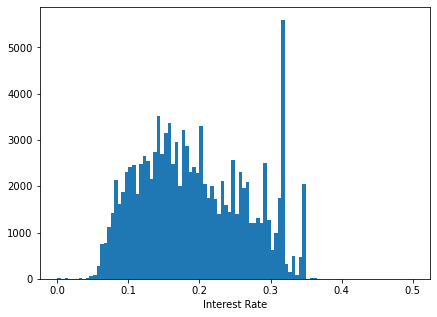

In [23]:
# # let's have look at BorrowerRate
bins =  np.arange(df['BorrowerRate'].min(), df['BorrowerRate'].max() + 0.005, 0.005)
plt.figure(figsize=[7, 5])
plt.hist(df['BorrowerRate'], bins=bins);
plt.xlabel('Interest Rate')
plt.show()

Let's take a look at **categorical variables**. 

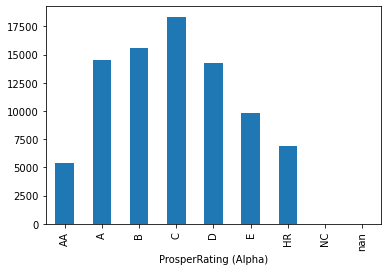

ProsperRating (Alpha) Percentage C      21.619742
B      18.362344
A      17.148480
D      16.822033
E      11.543493
HR      8.172958
AA      6.330949
nan     0.000000
NC      0.000000
Name: ProsperRating (Alpha), dtype: float64


In [24]:
# let's have look at ProsperRating (Alpha)
df.groupby('ProsperRating (Alpha)')['ListingKey'].count().plot.bar()
plt.show()
print('ProsperRating (Alpha) Percentage',df['ProsperRating (Alpha)'].value_counts(normalize=True) * 100)

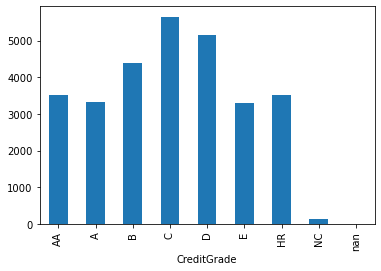

CreditGrade Percentage C      19.510932
D      17.797810
B      15.159051
AA     12.119642
HR     12.116188
A      11.449591
E      11.359790
NC      0.486996
nan     0.000000
Name: CreditGrade, dtype: float64


In [25]:
# let's have look at CreditGrade
df.groupby('CreditGrade')['ListingKey'].count().plot.bar()
plt.show()
print('CreditGrade Percentage',df['CreditGrade'].value_counts(normalize=True) * 100)

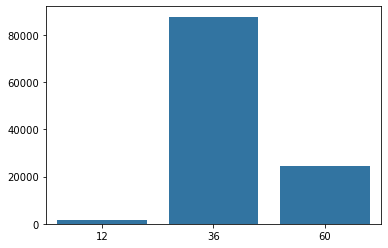

Term Percentage 36    77.040821
60    21.542607
12     1.416572
Name: Term, dtype: float64


In [26]:
# let's have look at Term
default_color = sns.color_palette()[0]
plt.figure(figsize=(6,4))
sns.barplot(x=df['Term'].value_counts().index, y=df['Term'].value_counts().values, color=default_color);
plt.show()
print('Term Percentage',df['Term'].value_counts(normalize=True) * 100)

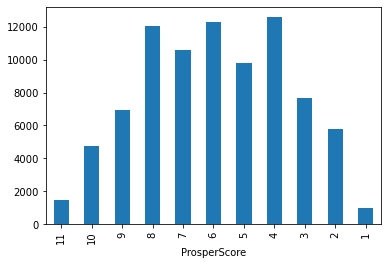

ProsperScore Percentage 4     14.843317
6     14.469730
8     14.204566
7     12.488657
5     11.564706
3      9.006164
9      8.144674
2      6.795281
10     5.597916
11     1.715909
1      1.169081
Name: ProsperScore, dtype: float64


In [27]:
# let's have look at ProsperScore
df.groupby(['ProsperScore'])['ListingKey'].count().plot.bar()
plt.show()
print('ProsperScore Percentage',df['ProsperScore'].value_counts(normalize=True) * 100)

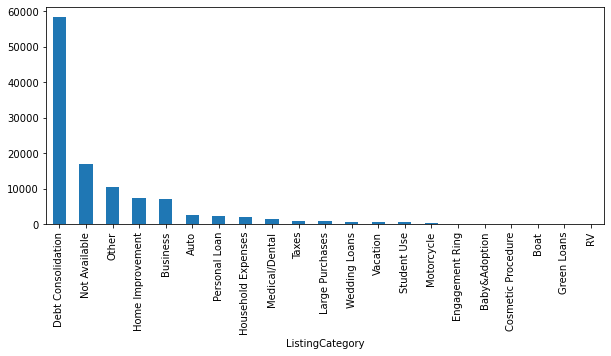

In [28]:
# let's have look at ListingCategory
plt.figure(figsize=(10,4))
df.groupby('ListingCategory')['ListingKey'].count().sort_values(ascending=False).plot.bar()
plt.show()

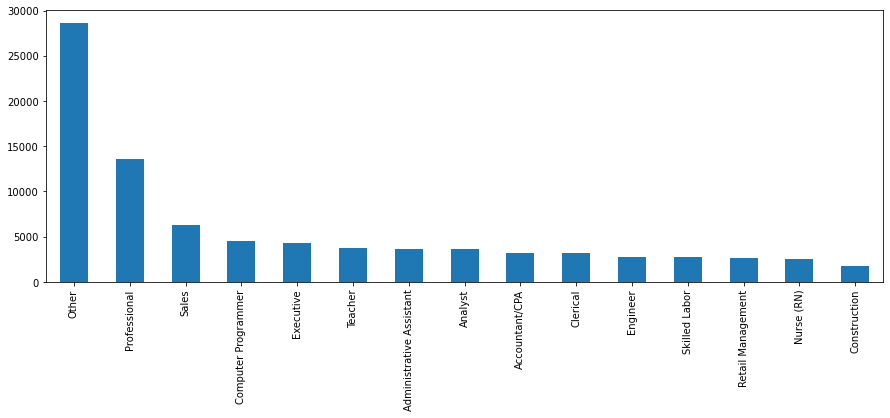

In [29]:
# let's have look at Occupation
plt.figure(figsize=(15,5))
df['Occupation'].value_counts().head(15).plot.bar()
plt.show()

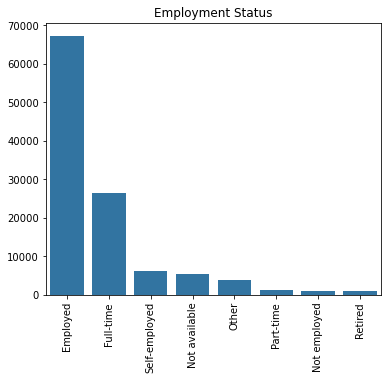

Employment Percentage Employed         60.280081
Full-time        23.598252
Self-employed     5.492380
Not available     4.787701
Other             3.407890
Part-time         0.974195
Not employed      0.747659
Retired           0.711843
Name: EmploymentStatus, dtype: float64


In [30]:
# let's have look at EmploymentStatus
default_color = sns.color_palette()[0]
plt.figure(figsize=(6,5))
sns.barplot(x=df['EmploymentStatus'].value_counts().index,y=df['EmploymentStatus'].value_counts().values, color=default_color);
plt.xticks(rotation=90);
plt.title('Employment Status')
plt.show()
print('Employment Percentage',df['EmploymentStatus'].value_counts(normalize=True) * 100)

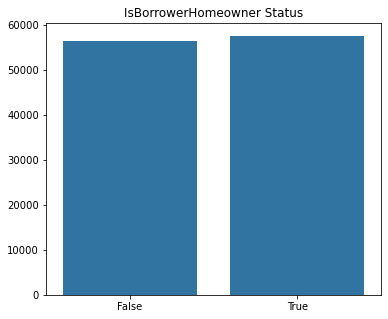

IsBorrowerHomeowner Percentage True     50.447177
False    49.552823
Name: IsBorrowerHomeowner, dtype: float64


In [31]:
# let's have look at IsBorrowerHomeowner
default_color = sns.color_palette()[0]
plt.figure(figsize=(6,5))
sns.barplot(x=df['IsBorrowerHomeowner'].value_counts().index,y=df['IsBorrowerHomeowner'].value_counts().values, color=default_color);
plt.title('IsBorrowerHomeowner Status')
plt.show()
print('IsBorrowerHomeowner Percentage',df['IsBorrowerHomeowner'].value_counts(normalize=True) * 100)

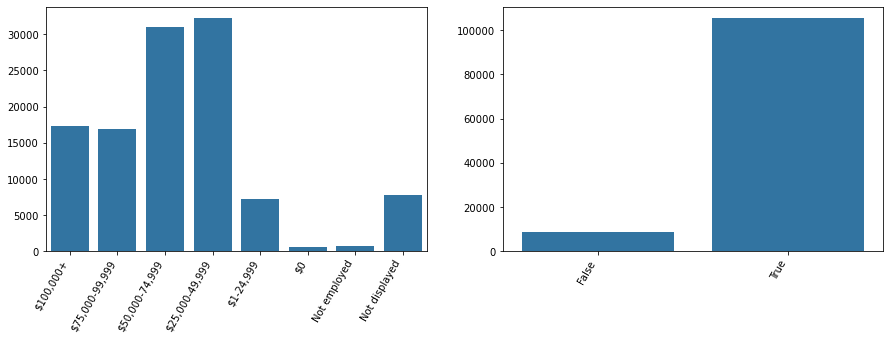

IncomeRange Percentage $25,000-49,999    28.254211
$50,000-74,999    27.251902
$100,000+         15.216304
$75,000-99,999    14.846801
Not displayed      6.794106
$1-24,999          6.384230
Not employed       0.707408
$0                 0.545038
Name: IncomeRange, dtype: float64
IncomeVerifiable Percentage True     92.391409
False     7.608591
Name: IncomeVerifiable, dtype: float64


In [32]:
# let's have look at IncomeRange and IncomeVerifiable
fig, ax = plt.subplots(ncols=2, figsize = [15,5])

default_color = sns.color_palette()[0]
sns.barplot(x=df['IncomeRange'].value_counts().index,y=df['IncomeRange'].value_counts().values,
            color = default_color, ax = ax[0])
sns.barplot(x=df['IncomeVerifiable'].value_counts().index,y=df['IncomeVerifiable'].value_counts().values,
            color = default_color, ax = ax[1])
fig.autofmt_xdate(rotation=60)
plt.show()
print('IncomeRange Percentage',df['IncomeRange'].value_counts(normalize=True) * 100)
print('IncomeVerifiable Percentage',df['IncomeVerifiable'].value_counts(normalize=True) * 100)

Let's turn to **Quantatitive variables**.

C:\Users\minsung_kim\AppData\Local\Continuum\anaconda3\envs\py38\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\minsung_kim\AppData\Local\Continuum\anaconda3\envs\py38\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\minsung_kim\AppData\Local\Continuum\anaconda3\envs\py38\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


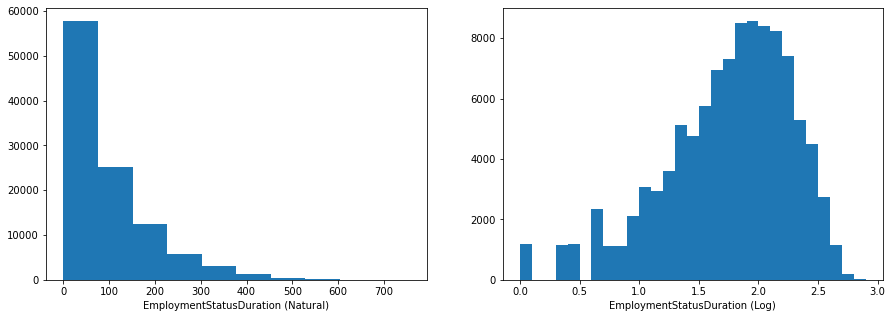

In [33]:
# let's have look at EmploymentStatusDuration
fig, ax = plt.subplots(ncols=2, figsize = [15,5])

default_color = sns.color_palette()[0]
bins_log = np.arange(0, np.log10(df['EmploymentStatusDuration']).max() + 0.1  , 0.1)
ax[0].hist(x = df['EmploymentStatusDuration'], color = default_color )
ax[0].set_xlabel('EmploymentStatusDuration (Natural)')
ax[1].hist(x = np.log10(df['EmploymentStatusDuration']), bins = bins_log, color = default_color )
ax[1].set_xlabel('EmploymentStatusDuration (Log)')
plt.show()

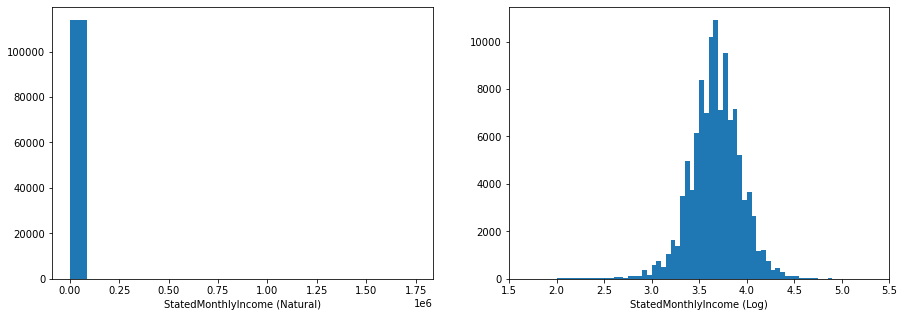

In [34]:
# let's have look at StatedMonthlyIncome
fig, ax = plt.subplots(ncols=2, figsize = [15,5])

default_color = sns.color_palette()[0]
bins_log = np.arange(0, np.log10(df['StatedMonthlyIncome']).max() + 0.05  , 0.05)
ax[0].hist(x = df['StatedMonthlyIncome'], color = default_color, bins=20)
ax[0].set_xlabel('StatedMonthlyIncome (Natural)')
ax[1].hist(x = np.log10(df['StatedMonthlyIncome']), bins = bins_log, color = default_color )
ax[1].set_xlabel('StatedMonthlyIncome (Log)')
ax[1].set_xlim(1.5,5.5)
plt.show()

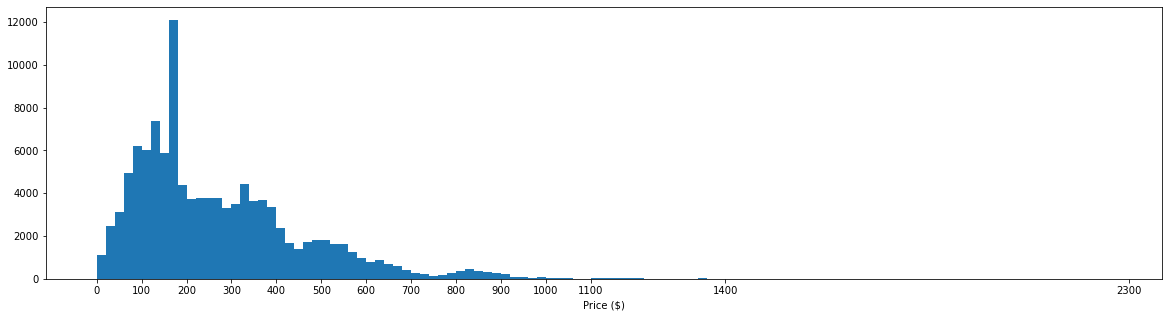

Max:  2251.51 ; Min:  0.0


In [35]:
# let's have look at MonthlyLoanPayment
bins =  np.arange(df['MonthlyLoanPayment'].min(), df['MonthlyLoanPayment'].max() + 20, 20)
plt.figure(figsize=[20, 5])
plt.hist(df['MonthlyLoanPayment'], bins=bins);
plt.xlabel('Price ($)')
plt.xticks([0,100,200,300,400,500,600,700,800,900,1000,1100,1400,2300])
plt.show()
print('Max: ', df['MonthlyLoanPayment'].max(), ';', 'Min: ',df['MonthlyLoanPayment'].min())

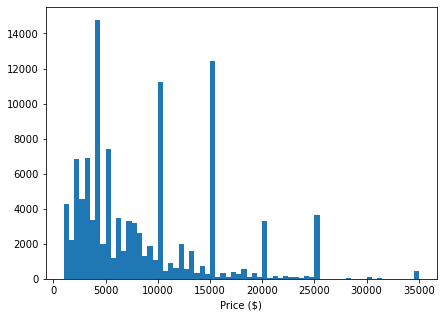

In [36]:
# let's have look at LoanOriginalAmount
bins =  np.arange(df['LoanOriginalAmount'].min(), df['LoanOriginalAmount'].max() + 500, 500)
plt.figure(figsize=[7, 5])
plt.hist(df['LoanOriginalAmount'], bins=bins);
plt.xlabel('Price ($)')
plt.show()

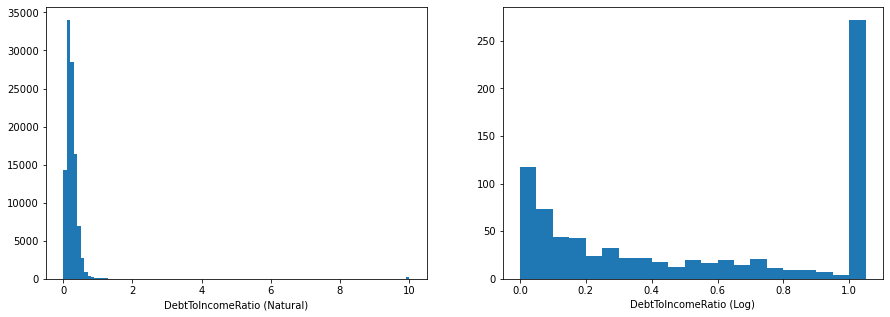

In [37]:
# let's have look at DebtToIncomeRatio
fig, ax = plt.subplots(ncols=2, figsize = [15,5])

default_color = sns.color_palette()[0]
bins_log = np.arange(0, np.log10(df['DebtToIncomeRatio']).max() + 0.05  , 0.05)
ax[0].hist(x = df['DebtToIncomeRatio'], color = default_color, bins=100)
ax[0].set_xlabel('DebtToIncomeRatio (Natural)')
ax[1].hist(x = np.log10(df['DebtToIncomeRatio']), bins = bins_log, color = default_color )
ax[1].set_xlabel('DebtToIncomeRatio (Log)')
plt.show()

In [38]:
len(df[df['DebtToIncomeRatio']>1]['DebtToIncomeRatio'])

799

## Insight of Univariate Exploration
I explored categorical and quantitative variables
####  The main feature of interest 
- BorrowerRate float64: The histogram of `BorrowerRate` shows slightly a right skewed shape and has the highest peak at around 0.31~0.32.

#### Categorical (Qualitative)
- Term int64 -> category: Most of the loans have 36 months and less than 2 %of the borrowers have 12 month loans.
- ProsperRating (Alpha) category: ProsperRating shows a symmetric  distribution. The main group of the borrowers have C and only few people have AA grade.
- CreditGrade category: Unlike ProsperRate, CreditGrade shows more AA grades than A grades. Furthermore, HR group is more than E and A groups.
- ProsperScore category: Most of the borrowers have between 4 to 8 ProsperScore.  
- ListingCategory category: The main purpose of loan is `Debt Consolidation` and we can see `Not Available` and `Other` in the second and third places respectively. The next common purpose is `Home Improvement` and `Business`.
- Occupation object: The borrowers are mostly `Professional` and `Sales` people (except for `Other` at the top)
- EmploymentStatus object: The majority of the borrowers is employed (categorised as Employed or Full-time). Interestingly, there is even retired people.
- IsBorrowerHomeowner bool: In terms of whether the borrowers are homeowner or not, the ratio is half and half.
- IncomeRange category,  IncomeVerifiable bool: As for `IncomeRange`, the main groups are \\$50,000-74,999 and \\$25,000-49,999 and there are more people of IncomeRange over \\$75,000 than below \\$24,999 or no income. Regarding IncomeVerifiable, more than 90% incomes are verifiable although there are around 8% incomes which are not verifiable.

#### Quantitative
- EmploymentStatusDuration float64: The majoriy of `EmploymentStatusDuration` is 0 ~ 200 months. Furthermore,since the natural histogram of `EmploymentStatusDuration` is skewed to the right, I changed the value into log scale. 
- StatedMonthlyIncome float64: The natural plot of `StatedMonthlyIncome`is skewed strongly to the right. So I first changed the plot to logscale then set the limit between 1.5 to 5.5.  Most of the borrowers get monthly less than \\$10,000. 
- MonthlyLoanPayment float64: In terms of `MonthlyLoanPayment`, we can see four peaks on the plot, at \\$190, at \\$320 , at \\$500 at \\$830. 
- LoanOriginalAmount int64: There is a pattern in the char of `LoanOriginalAmount`. Many loans are the amount of multiples of 5,000 (5000, 10000, 15000, 20000.. etc)
- DebtToIncomeRatio int64: The borrowers mainly have `DebtToIncomeRatio` less than 1 but there are around 800 people with `DebtToIncomeRatio` over 1

## Bivariate Exploration

In [39]:
quantitative = ['EmploymentStatusDuration', 'MonthlyLoanPayment', 'LoanOriginalAmount', 'DebtToIncomeRatio', 'BorrowerRate']

categorical = ['Term', 'ProsperRating (Alpha)', 'CreditGrade', 'ProsperScore', 'ListingCategory', 'Occupation',
               'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange', 'IncomeVerifiable']

### Relationship between `BorrowerRate` and  other `quantitative variables`

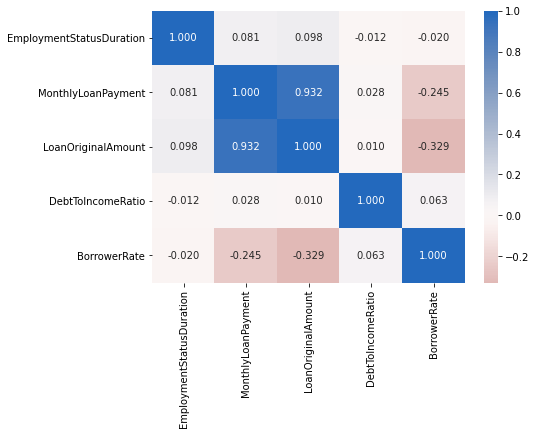

In [40]:
# correlation plot
plt.figure(figsize = [7, 5])
sns.heatmap(df[quantitative].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

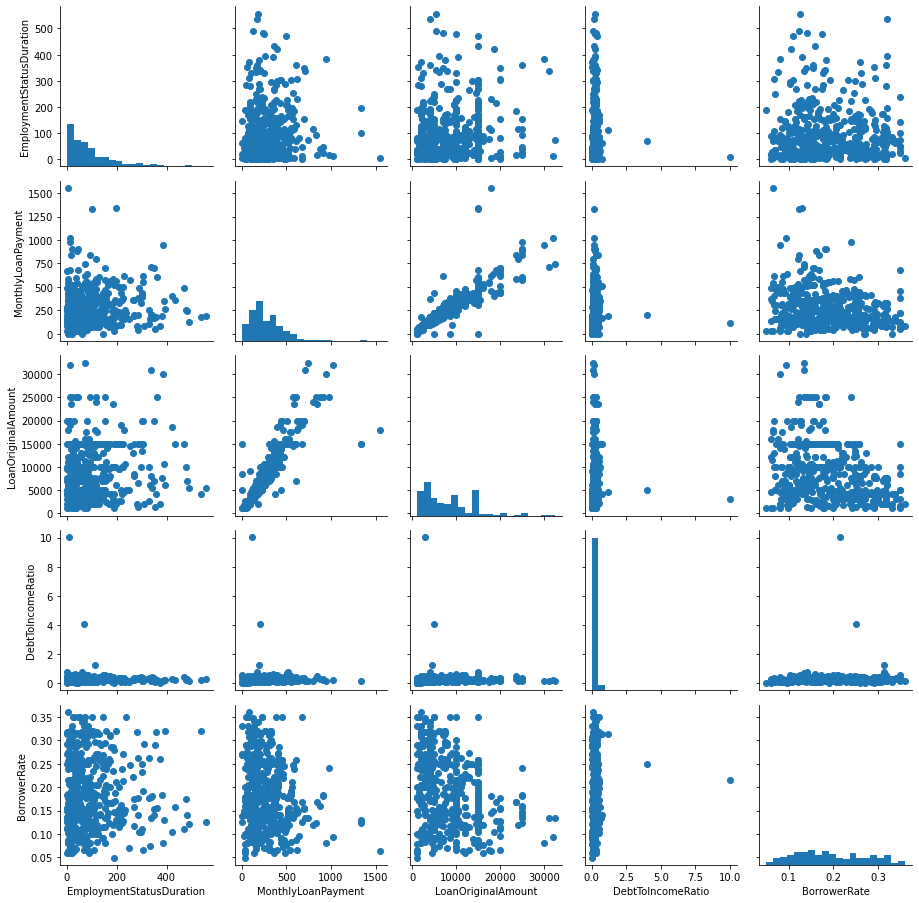

In [41]:
# plot matrix: sample 500 loans so that plots are clearer and
# they render faster
samples = np.random.choice(df.shape[0], 500, replace = False)
df_samp = df.loc[samples,:]

g = sns.PairGrid(data = df_samp, vars = quantitative)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

### Relationship between `BorrowerRate` and  other `categorical variables`

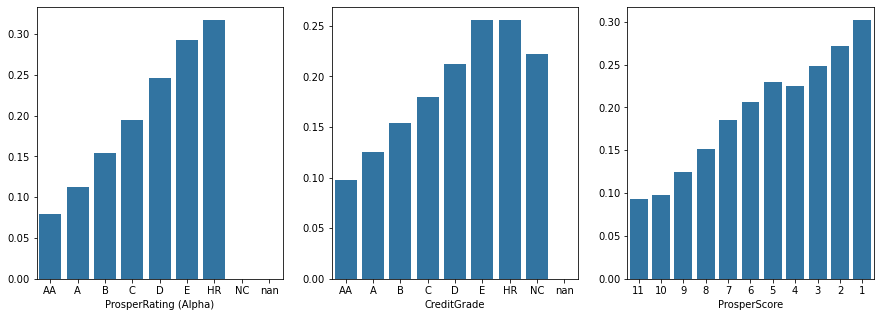

In [42]:
# BorrowerRate with ProsperRating (Alpha), CreditGrade, and ProsperScore

fig, ax = plt.subplots(ncols=3, figsize = [15,5])

default_color = sns.color_palette()[0]
sns.barplot(x = df.groupby(['ProsperRating (Alpha)'])['BorrowerRate'].mean().sort_values(ascending=False).index,
              y = df.groupby(['ProsperRating (Alpha)'])['BorrowerRate'].mean().sort_values(ascending=False).values,
             color = default_color, ax = ax[0])
sns.barplot(x = df.groupby(['CreditGrade'])['BorrowerRate'].mean().sort_values(ascending=False).index,
            y = df.groupby(['CreditGrade'])['BorrowerRate'].mean().sort_values(ascending=False).values,
             color = default_color, ax = ax[1])
sns.barplot(x = df.groupby(['ProsperScore'])['BorrowerRate'].mean().sort_values(ascending=False).index,
            y = df.groupby(['ProsperScore'])['BorrowerRate'].mean().sort_values(ascending=False).values,
             color = default_color, ax = ax[2])
plt.show()

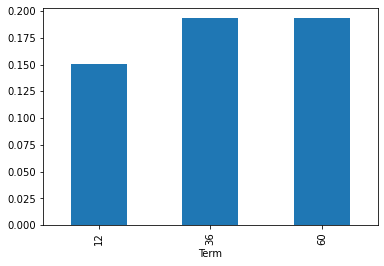

In [43]:
# let's check BorrowerRate by Term
df.groupby('Term')['BorrowerRate'].mean().plot.bar()

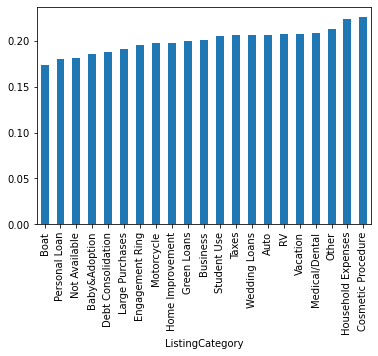

In [55]:
# let's check BorrowerRate by ListingCategory
df.groupby('ListingCategory')['BorrowerRate'].mean().sort_values().plot.bar()

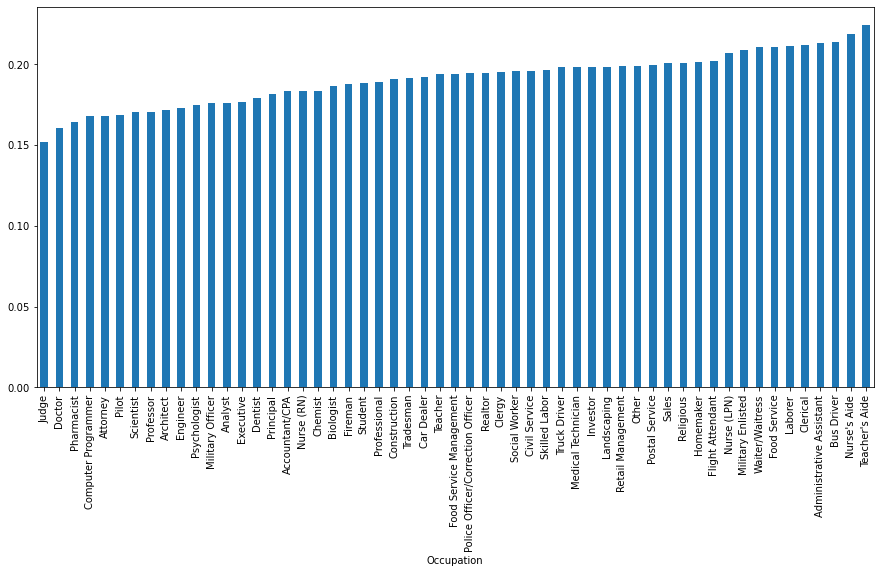

In [56]:
# let's check BorrowerRate by occupation
df.groupby(['Occupation'])['BorrowerRate'].mean().sort_values().plot.bar(figsize=(15,7))

C:\Users\minsung_kim\AppData\Local\Continuum\anaconda3\envs\py38\lib\site-packages\seaborn\axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

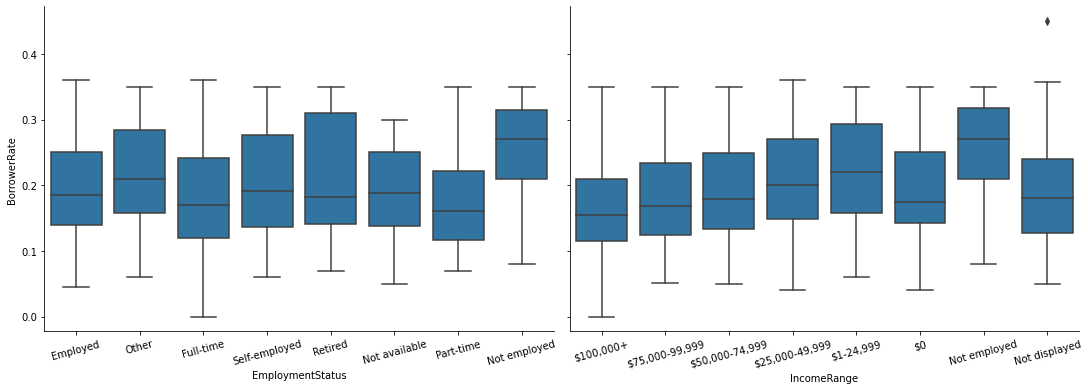

In [57]:
# Let's have a look at relationships between BorrowerRate vs. EmploymentStatus and IncomeRagne
categoric_vars_box = ['EmploymentStatus', 'IncomeRange']
samples = np.random.choice(df.shape[0], 10000, replace = False)
loan_df_samp = df.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """

    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)
    plt.xticks(rotation = 15)
    

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = loan_df_samp, y_vars = [ 'BorrowerRate'], 
                x_vars = categoric_vars_box, size = 5, aspect = 1.5)

g.map(boxgrid);
plt.xticks(rotation = 15)
plt.show();

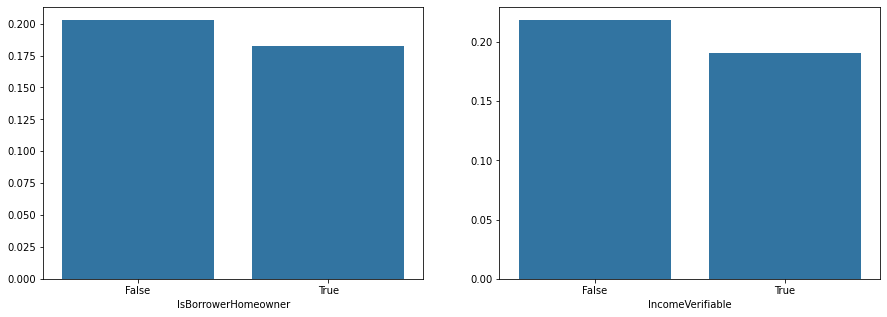

In [47]:
# BorrowerRate with IsBorrowerHomeowner and IncomeVerifiable

fig, ax = plt.subplots(ncols=2, figsize = [15,5])

default_color = sns.color_palette()[0]
sns.barplot(x = df.groupby(['IsBorrowerHomeowner'])['BorrowerRate'].mean().sort_values(ascending=False).index,
              y = df.groupby(['IsBorrowerHomeowner'])['BorrowerRate'].mean().sort_values(ascending=False).values,
             color = default_color, ax = ax[0])
sns.barplot(x = df.groupby(['IncomeVerifiable'])['BorrowerRate'].mean().sort_values(ascending=False).index,
            y = df.groupby(['IncomeVerifiable'])['BorrowerRate'].mean().sort_values(ascending=False).values,
             color = default_color, ax = ax[1])

plt.show()

### Relationship between  some `categorical variables`

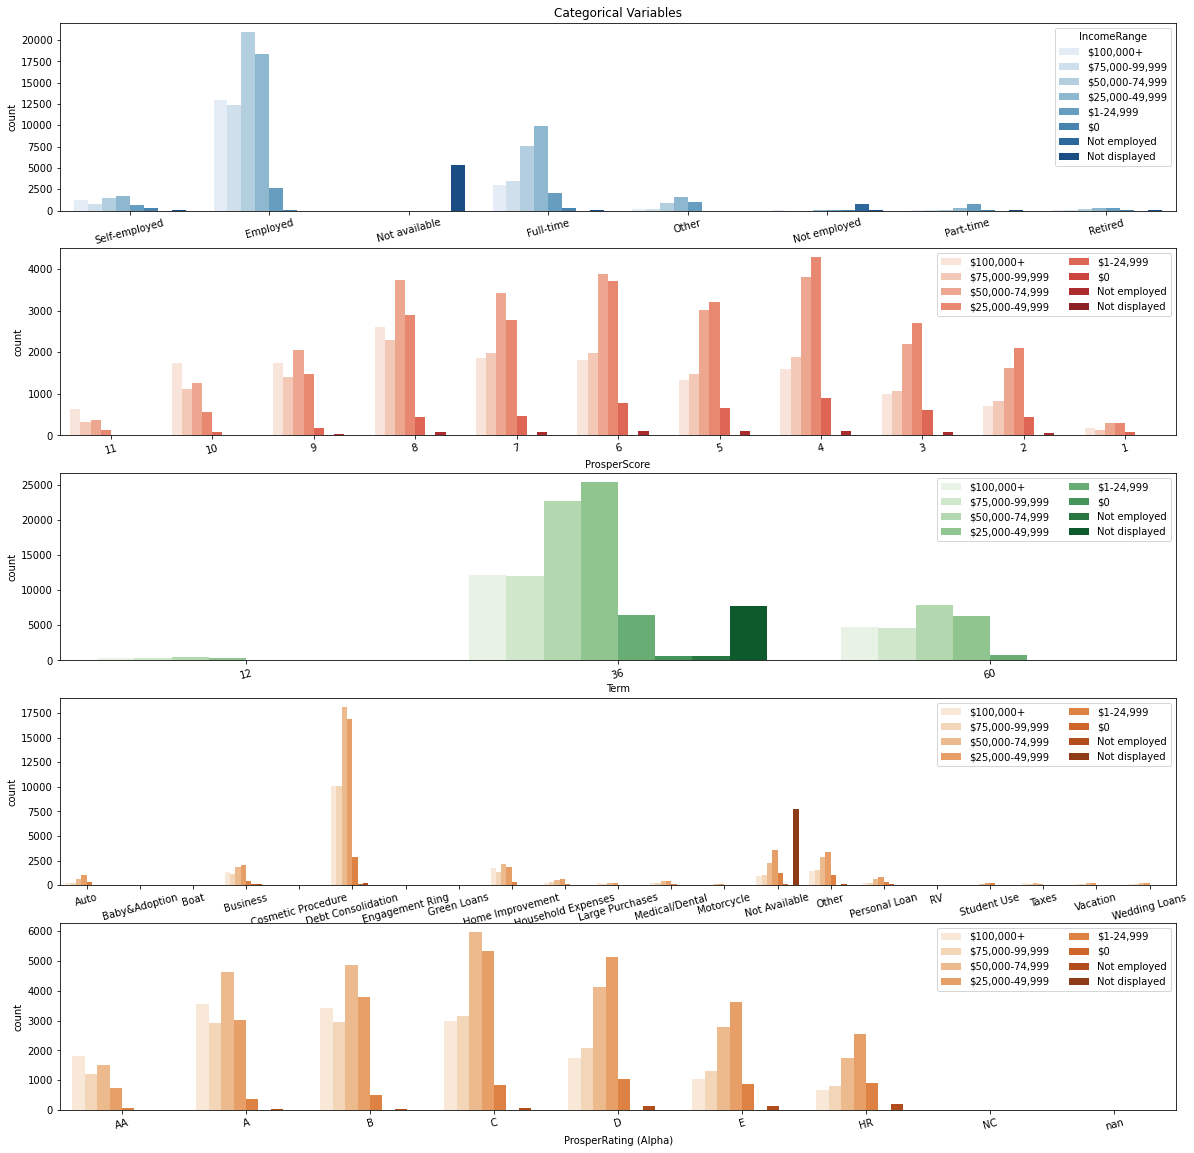

In [48]:
# let's have look at the relationships between categorical variables
plt.figure(figsize = [20, 20])

# subplot 1: EmploymentStatus vs IncomeRange
plt.subplot(5, 1, 1)
sns.countplot(data = df, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Blues')
plt.xticks(rotation = 15)
plt.title('Categorical Variables')

# subplot 2: ProsperScore vs. IncomeRange
ax = plt.subplot(5, 1, 2)
sns.countplot(data = df, x = 'ProsperScore', hue = 'IncomeRange', palette = 'Reds')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation = 15)


# subplot 3: Term vs. IncomeRange
ax = plt.subplot(5, 1, 3)
sns.countplot(data = df, x = 'Term', hue = 'IncomeRange', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.xticks(rotation = 15)

# subplot 4: ListingCategory vs. IncomeRange
ax = plt.subplot(5, 1, 4)
sns.countplot(data = df, x = 'ListingCategory', hue = 'IncomeRange', palette = 'Oranges')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.xticks(rotation = 15)

# subplot 5: ProsperRating (Alpha) vs. IncomeRange
ax = plt.subplot(5, 1, 5)
sns.countplot(data = df, x = 'ProsperRating (Alpha)', hue = 'IncomeRange', palette = 'Oranges')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.xticks(rotation = 15)

plt.show()

## Insight of Bivariate Exploration
I explored relationships between categorical and quantitative variables.

#### Relationship between `BorrowerRate` and  other `quantitative variables`
##### correlation plot
- `MonthlyLoanPayment` and `LoanOriginalAmount` show a strong positive correlation among the quantitative variables (not with `BorrowerRate`). However, there are not any positive correlations between `BorrowerRate` and the other quantitative variables, while `LoanOriginalAmount` and `MonthlyLoanPayment` show weak negative correlations (-0.33, -0.25 respectively) with `BorrowerRate`.

#### Relationship between `BorrowerRate` and  other `categorical variables`
##### BorrowerRate with ProsperRating (Alpha), CreditGrade, and ProsperScore
- As can be seen the bar charts above, it is clear that the better `CreditGrade/ProsperRating (Alpha)/ProsperScore` (three scores related to credit) is, the lower `BorrowerRate` is. 
##### BorrowerRate by Term
- In terms of the relationship between `BorrowerRate` and `Term`, it is obvious that shoter term turns out to be lower interest.
#### BorrowerRate by ListingCategory
- When it comes to `ListingCategory`, it is interesting that the borrowers for boats get the lowest interest rate, whereas `Cosmetic Procedure` and `Household expenses` categories show the highest and the second highest `BorrowerRate`
#### BorrowerRate by occupation
- As to `Occupation`, the borrower with the highest `BorrowerRate` is `Teacher's Aide` and it is followed by `Nurse's Aide` and `Bus Driver`. At the bottom of the list, there are `Judge`, `Doctor`, and `Phamarcist`.
#### BorrowerRate by EmploymentStatus, IncomeRange
- When it comes to `EmploymentStatus` and `IncomeRange`, `EmploymentStatus` shows that emplpoyed borrowers (`Full-time` and `Employed`) have the lowest `BorrowerRate`, while `Not Employed` has the highest interest rate. Besides, it is clear that the higher the person's income is, the lower interest he/she gets according to the `IncomeRage vs. BorrowerRate` box plot down to \\$0 income. Interestingly, \\$0 income people have lower `BorrowerRate` than \\$50,000-\\$74,999, \\$25,000-\\$49,999, and \\$1-\\$24,999. However, if they're not employed (`Not employed`) you get the highest interest rate like in `EmploymentStatus vs. BorrowerRate` plot.
#### BorrowerRate with IsBorrowerHomeowner and IncomeVerifiable
- The borrowers having houses also get lower `BorrowerRate` than the others. Morevoer, if the borrowers verify their income, they get lower interest rate. 

## Multivariate Exploration

### What is the relationship between BorrowerRate and IncomeRange and ProsperRating (Alpha)

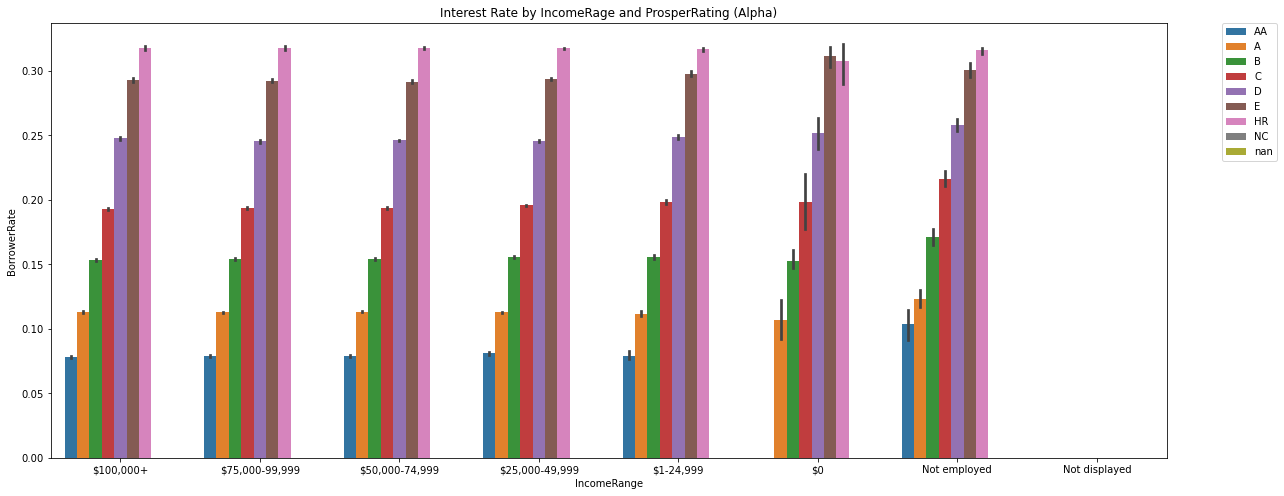

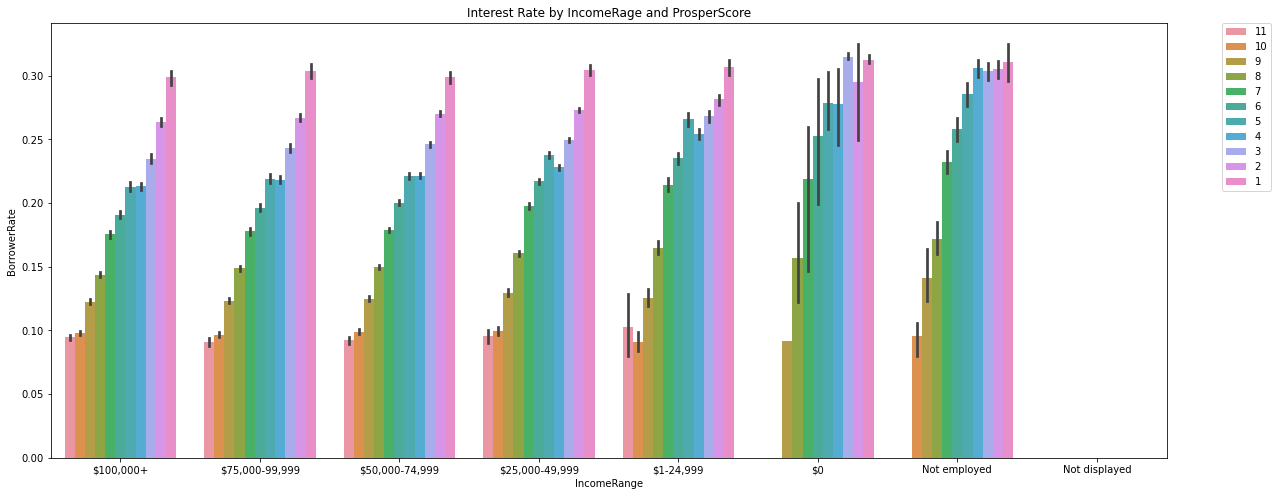

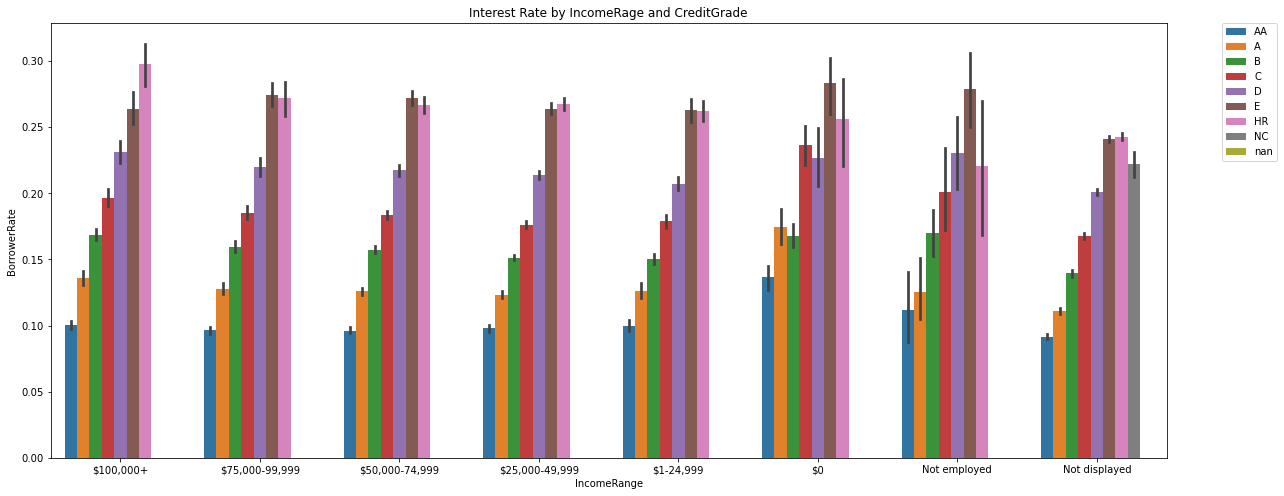

In [64]:
for i in ['ProsperRating (Alpha)', 'ProsperScore', 'CreditGrade']:
    plt.figure(figsize = [20, 8])
    sns.barplot(x = df['IncomeRange'], y = df['BorrowerRate'], hue = df[i])
    plt.legend(framealpha = 1, title = i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('Interest Rate by IncomeRage and {}'.format(i));

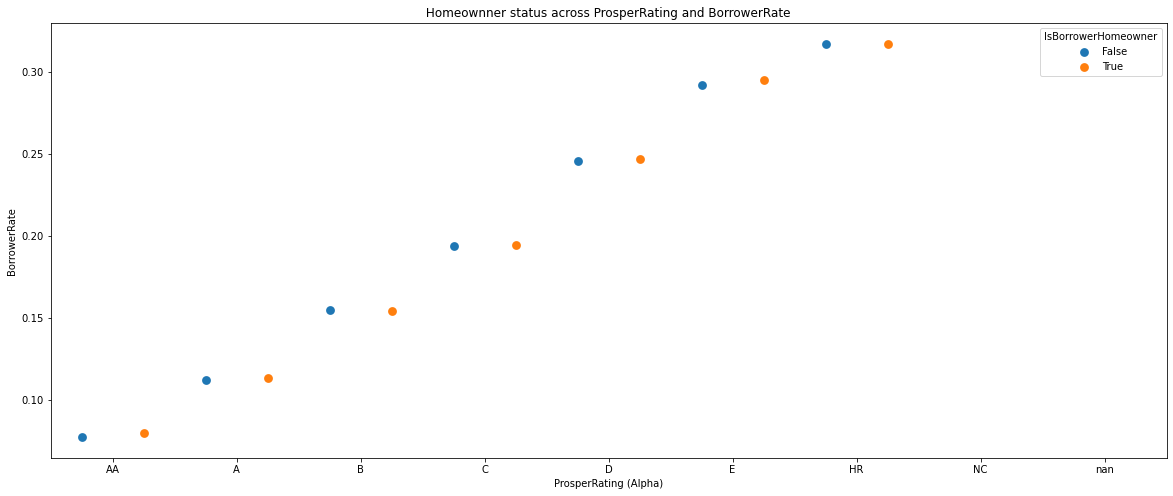

In [51]:
plt.figure(figsize = [20, 8])
sns.pointplot(x = df['ProsperRating (Alpha)'], y = df['BorrowerRate'], hue = df['IsBorrowerHomeowner'],
              dodge = 0.5, linestyles = "");
plt.title(' Homeownner status across ProsperRating and BorrowerRate ');

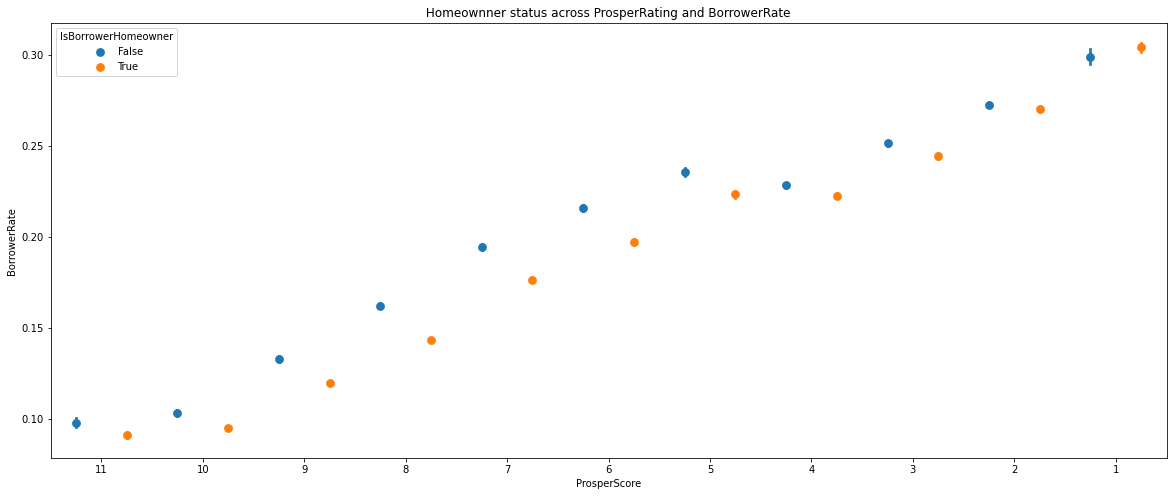

In [52]:
plt.figure(figsize = [20, 8])
sns.pointplot(x = df['ProsperScore'], y = df['BorrowerRate'], hue = df['IsBorrowerHomeowner'],
              dodge = 0.5, linestyles = "");
plt.title(' Homeownner status across ProsperRating and BorrowerRate ');

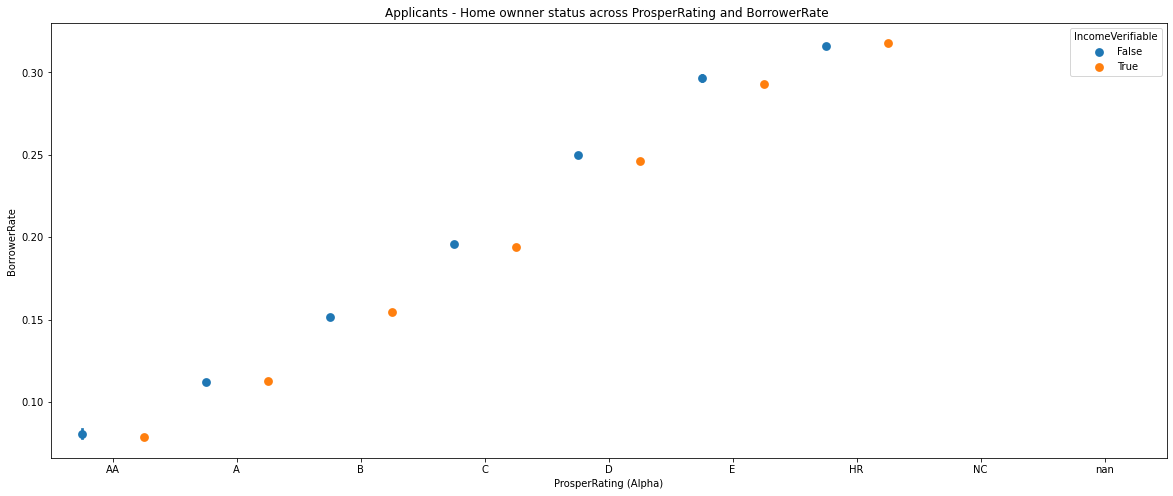

In [53]:
plt.figure(figsize = [20, 8])
sns.pointplot(x = df['ProsperRating (Alpha)'], y = df['BorrowerRate'], hue = df['IncomeVerifiable'], 
              dodge = 0.5, linestyles = "");
plt.title('Applicants - Home ownner status across ProsperRating and BorrowerRate ');

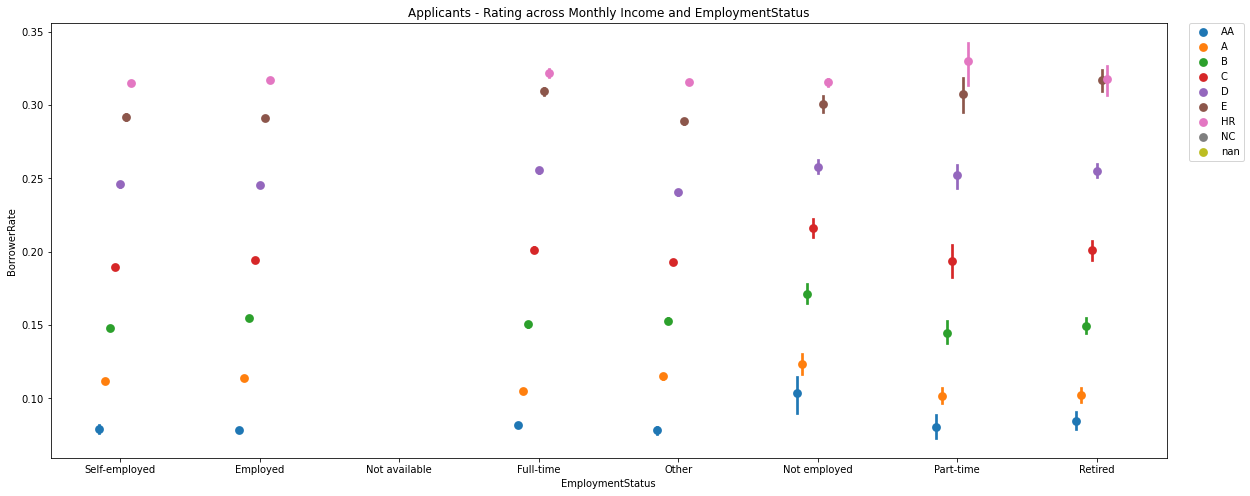

In [54]:
plt.figure(figsize = [20, 8])
sns.pointplot(x = df['EmploymentStatus'], y = df['BorrowerRate'], hue = df['ProsperRating (Alpha)'],
              dodge = 0.3, linestyles = "")
plt.title('Applicants - Rating across Monthly Income and EmploymentStatus');
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
